In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
from BondingCurveNexus import single_sim
from BondingCurveNexus import multi_sim

100%|████████████████████████████████████████████████████████████████████████████████████████████| 730/730 [00:00<00:00, 1266.16it/s]


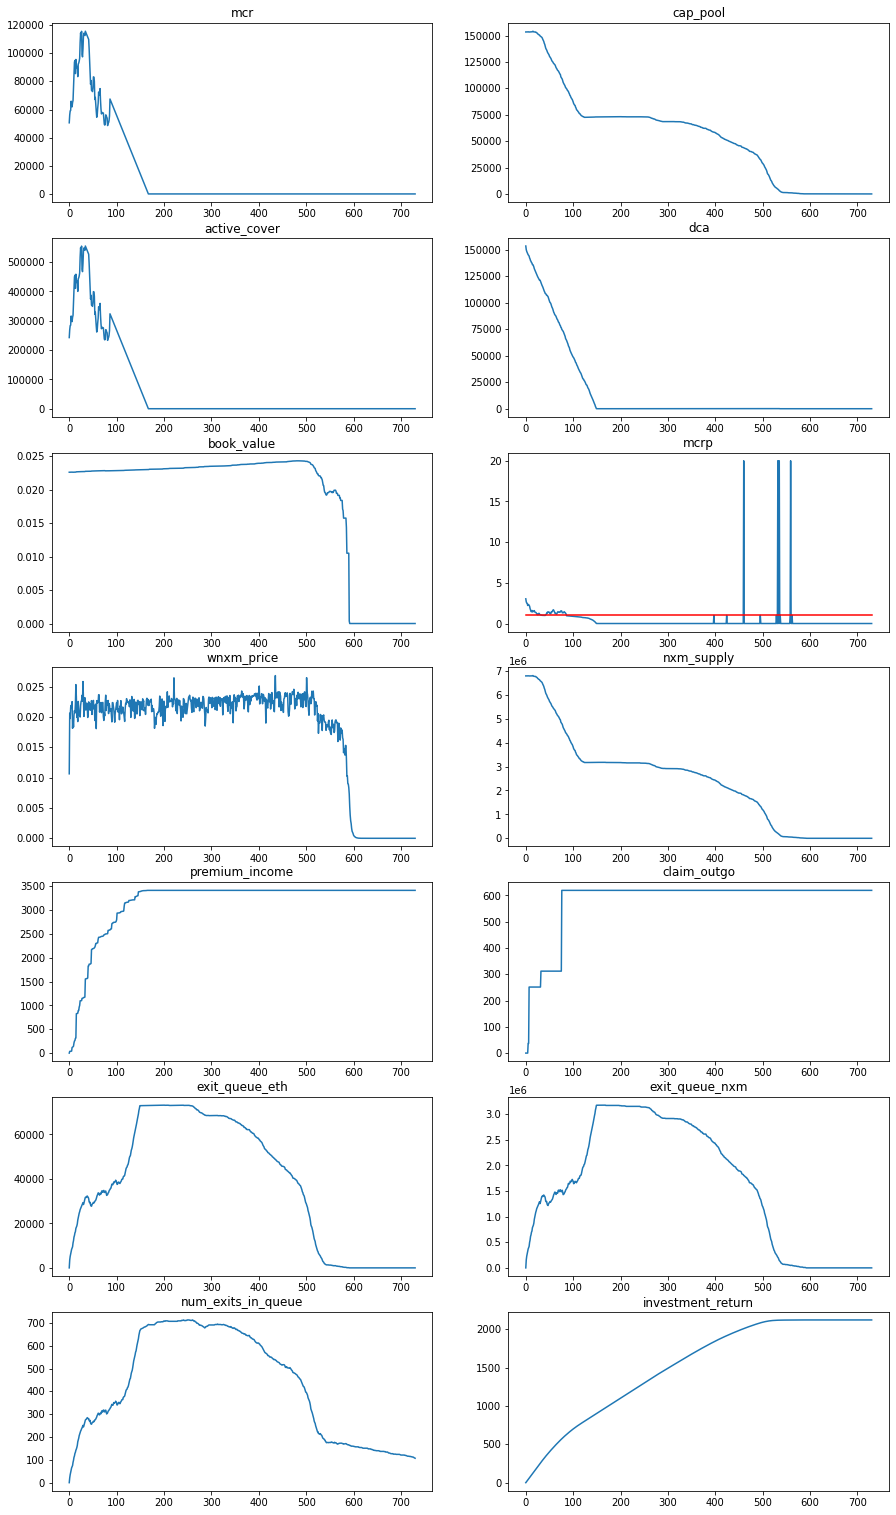

In [86]:
%run ../BondingCurveNexus/single_sim.py

In [69]:
np.array(sim.act_cover_prediction)[590:594]

array([0., 0., 0., 0.])

In [68]:
np.array(sim.exit_queue_eth_prediction)[590:594]

array([120.8251001 ,  43.60707594, -12.63892693, -12.63961266])

In [85]:
np.array(sim.dca_prediction).min()

-0.03632188601477537

In [70]:
np.array(sim.exit_queue_nxm_prediction)[590:594]

array([10064.16591362,  6140.0229497 ,  2681.44246408,  2681.44246408])

In [72]:
np.array(sim.nxm_supply_prediction)[590:594]

array([10064.16591362,  6140.0229497 ,  2681.44246408,  2681.44246408])

In [73]:
np.array(sim.cap_pool_prediction)[590:594]/np.array(sim.nxm_supply_prediction)[590:594]

array([ 0.01200548,  0.0071021 , -0.00471348, -0.00471374])

In [80]:
np.array(sim.book_value_prediction).min()

-0.0005009046733774569

In [53]:
sim.exit_queue_eth_prediction[639]

-2084.06283638679

In [79]:
np.array(sim.wnxm_prediction).min()

6.726814890608698e-25

In [81]:
np.array(sim.nxm_supply_prediction).min()

3963.6277374302244

In [ ]:
from BondingCurveNexus.sys_class import NexusSystem

In [ ]:
sim = NexusSystem()

In [ ]:
for i in range(200):
    sim.one_day_passes()

In [ ]:
sim.exit_array.shape

In [ ]:
a

In [ ]:
sim.exit_array.shape

In [ ]:
sim.one_day_passes()

In [ ]:
sim.exit_array.shape

In [ ]:
sim.exit_array[:, -1]

In [ ]:
sim.mcr()

In [ ]:
a = np.array([7,8,9,5,2,1,5,6,1])

print(np.where(a>7.5)[0][0])